# Присвоение и изменение объектов

Простое присвоение сложных изменяемых объектов (список, словарь, датафрейм) на самом деле копирыет в новую переменную ссылку на этот объект.

In [109]:
dict1 = {'a': 1, 'b': 2, 'c': 3}
dict2 = dict1
dict2['a'] = ord('a')
dict1['a']
# when you change data in dict2, dict1 is changed also

97

In [110]:
dict1 = {'a': 1, 'b': 2, 'c': 3}
dict2 = dict(dict1) #dict1.copy()
dict2['a'] = ord('a')
dict1['a']
# when you change data in dict2, dict1 doesn't change

1

# Преобразования DataFrame

In [111]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
d = {'col1': [1, 2, 5], 'col2': [3, 4, 6]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4
2,5,6


In [113]:
df1 = df
df1.loc[2,'col1']=1 # change data in specific cell
df1

,col1,col2
0,1,3
1,2,4
2,1,6


In [114]:
df # df.loc[2,'col1'] also changed

,col1,col2
0,1,3
1,2,4
2,1,6


In [115]:
df = pd.read_csv('weather_data.csv')
df.tail() # show the last rows of dataset

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036
999999,New York,2024-04-16 16:11:52,10.725351,43.804584,1.883292,15.363828


In [116]:
df.describe() # show statistic functions 

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [117]:
df.columns

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

In [118]:
# show mean Humidity in days without Precipitation
df[df['Precipitation_mm']<0.001]['Humidity_pct'].mean()

np.float64(61.82546656024926)

In [119]:
df['Date_Time']

0         2024-01-14 21:12:46
1         2024-05-17 15:22:10
2         2024-05-11 09:30:59
3         2024-02-26 17:32:39
4         2024-04-29 13:23:51
                 ...         
999995    2024-01-01 20:29:48
999996    2024-01-20 15:59:48
999997    2024-04-14 08:30:09
999998    2024-05-12 20:10:43
999999    2024-04-16 16:11:52
Name: Date_Time, Length: 1000000, dtype: object

In [120]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date_Time'] # show Date_Time as a column

0        2024-01-14 21:12:46
1        2024-05-17 15:22:10
2        2024-05-11 09:30:59
3        2024-02-26 17:32:39
4        2024-04-29 13:23:51
                 ...        
999995   2024-01-01 20:29:48
999996   2024-01-20 15:59:48
999997   2024-04-14 08:30:09
999998   2024-05-12 20:10:43
999999   2024-04-16 16:11:52
Name: Date_Time, Length: 1000000, dtype: datetime64[ns]

In [121]:
df[['Date_Time']] # show Date_Time as DataFrame with one column

,Date_Time
0,2024-01-14 21:12:46
1,2024-05-17 15:22:10
2,2024-05-11 09:30:59
3,2024-02-26 17:32:39
4,2024-04-29 13:23:51
...,...
999995,2024-01-01 20:29:48
999996,2024-01-20 15:59:48
999997,2024-04-14 08:30:09
999998,2024-05-12 20:10:43


In [122]:
# new DataFrame 
df1 = pd.DataFrame(df[['Location', 'Date_Time', 'Temperature_C', 'Wind_Speed_kmh']])
df1.head()

,Location,Date_Time,Temperature_C,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,29.898622


In [123]:
df1['Date_Time'].dt.month # 

0         1
1         5
2         5
3         2
4         4
         ..
999995    1
999996    1
999997    4
999998    5
999999    4
Name: Date_Time, Length: 1000000, dtype: int32

In [124]:
df1['date'] = df1['Date_Time'].dt.date
df1

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date
0,San Diego,2024-01-14 21:12:46,10.683001,8.233540,2024-01-14
1,San Diego,2024-05-17 15:22:10,8.734140,27.715161,2024-05-17
2,San Diego,2024-05-11 09:30:59,11.632436,28.732951,2024-05-11
3,Philadelphia,2024-02-26 17:32:39,-8.628976,26.367303,2024-02-26
4,San Antonio,2024-04-29 13:23:51,39.808213,29.898622,2024-04-29
...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,16.538119,2024-01-01
999996,San Antonio,2024-01-20 15:59:48,6.759080,29.005558,2024-01-20
999997,New York,2024-04-14 08:30:09,15.664465,0.403909,2024-04-14
999998,Chicago,2024-05-12 20:10:43,18.999994,6.326036,2024-05-12


In [125]:
df['Location'].unique() # show all possible values

array(['San Diego', 'Philadelphia', 'San Antonio', 'San Jose', 'New York',
       'Houston', 'Dallas', 'Chicago', 'Los Angeles', 'Phoenix'],
      dtype=object)

In [126]:
df1[df1['Location'].isin(['San Diego','San Jose','Los Angeles'])] 
# choose several values

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date
0,San Diego,2024-01-14 21:12:46,10.683001,8.233540,2024-01-14
1,San Diego,2024-05-17 15:22:10,8.734140,27.715161,2024-05-17
2,San Diego,2024-05-11 09:30:59,11.632436,28.732951,2024-05-11
5,San Diego,2024-01-21 08:54:56,27.341055,27.473896,2024-01-21
6,San Jose,2024-01-13 02:10:54,1.881883,1.073112,2024-01-13
...,...,...,...,...,...
999986,Los Angeles,2024-04-20 19:23:33,-7.866196,6.283328,2024-04-20
999987,San Diego,2024-05-03 07:40:01,1.045226,2.369581,2024-05-03
999989,San Diego,2024-03-14 09:24:02,0.954422,29.620164,2024-03-14
999992,San Jose,2024-01-22 15:43:07,14.067557,11.883972,2024-01-22


In [127]:
df1.isna() # check every cell if it isn't defined

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
999995,False,False,False,False,False
999996,False,False,False,False,False
999997,False,False,False,False,False
999998,False,False,False,False,False


In [128]:
df1.isna().sum() # count not defined cells

Location          0
Date_Time         0
Temperature_C     0
Wind_Speed_kmh    0
date              0
dtype: int64

In [129]:
df1[df1['Location']=='Los Angeles']
# show only one city data

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date
29,Los Angeles,2024-02-15 20:47:24,-2.409511,7.437357,2024-02-15
62,Los Angeles,2024-02-05 12:16:34,30.728417,29.129348,2024-02-05
64,Los Angeles,2024-02-06 19:02:21,31.730567,19.710325,2024-02-06
70,Los Angeles,2024-01-06 19:12:46,33.335417,17.432628,2024-01-06
79,Los Angeles,2024-05-17 09:13:01,-3.089434,20.474035,2024-05-17
...,...,...,...,...,...
999949,Los Angeles,2024-01-24 12:49:30,28.114686,1.393236,2024-01-24
999963,Los Angeles,2024-04-03 16:45:11,18.717675,0.360644,2024-04-03
999980,Los Angeles,2024-03-27 12:25:39,34.641340,19.607961,2024-03-27
999986,Los Angeles,2024-04-20 19:23:33,-7.866196,6.283328,2024-04-20


In [130]:
# apply functions to the columns
df1.agg({'Temperature_C': ['min', 'max'], 
         'Wind_Speed_kmh': ['min', 'max', 'count']})

,Temperature_C,Wind_Speed_kmh
min,-19.969311,0.000051
max,39.999801,29.999973
count,NaN,1000000.000000


In [131]:
# apply functions to the columns for LA
df1[df1['Location']=='Los Angeles'].agg({'Temperature_C': ['min', 'max'], 
         'Wind_Speed_kmh': ['min', 'max', 'count']})

,Temperature_C,Wind_Speed_kmh
min,-9.999913,0.000173
max,39.999592,29.999757
count,NaN,99922.000000


In [132]:
df1['WaterFrozen'] = np.where(df1['Temperature_C']<0,True,False)
df1[['Temperature_C','WaterFrozen']].head(20)

,Temperature_C,WaterFrozen
0,10.683001,False
1,8.734140,False
2,11.632436,False
3,-8.628976,True
4,39.808213,False
5,27.341055,False
6,1.881883,False
7,-6.894766,True
8,0.963545,False
9,-1.607088,True


In [133]:
df1.sort_values(by='Date_Time')

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
360731,Phoenix,2024-01-01 00:00:06,0.618582,5.321995,2024-01-01,False
689109,Houston,2024-01-01 00:00:06,39.469465,20.475434,2024-01-01,False
884595,Los Angeles,2024-01-01 00:00:15,35.920611,21.634439,2024-01-01,False
628847,San Antonio,2024-01-01 00:00:18,32.048197,23.335641,2024-01-01,False
706342,San Diego,2024-01-01 00:00:31,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...,...
985301,Chicago,2024-05-18 19:43:30,-1.561114,7.852678,2024-05-18,True
216426,Philadelphia,2024-05-18 19:43:50,8.597967,21.671935,2024-05-18,False
324735,New York,2024-05-18 19:43:55,7.679884,21.417264,2024-05-18,False
809633,Houston,2024-05-18 19:44:02,34.038278,4.530607,2024-05-18,False


In [134]:
df1 # Method sort_values didn't changed dataframe

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
0,San Diego,2024-01-14 21:12:46,10.683001,8.233540,2024-01-14,False
1,San Diego,2024-05-17 15:22:10,8.734140,27.715161,2024-05-17,False
2,San Diego,2024-05-11 09:30:59,11.632436,28.732951,2024-05-11,False
3,Philadelphia,2024-02-26 17:32:39,-8.628976,26.367303,2024-02-26,True
4,San Antonio,2024-04-29 13:23:51,39.808213,29.898622,2024-04-29,False
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,16.538119,2024-01-01,False
999996,San Antonio,2024-01-20 15:59:48,6.759080,29.005558,2024-01-20,False
999997,New York,2024-04-14 08:30:09,15.664465,0.403909,2024-04-14,False
999998,Chicago,2024-05-12 20:10:43,18.999994,6.326036,2024-05-12,False


In [135]:
df1 = df1.sort_values(by='Date_Time') # we put the result of method to the variable df1
df1 

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
360731,Phoenix,2024-01-01 00:00:06,0.618582,5.321995,2024-01-01,False
689109,Houston,2024-01-01 00:00:06,39.469465,20.475434,2024-01-01,False
884595,Los Angeles,2024-01-01 00:00:15,35.920611,21.634439,2024-01-01,False
628847,San Antonio,2024-01-01 00:00:18,32.048197,23.335641,2024-01-01,False
706342,San Diego,2024-01-01 00:00:31,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...,...
985301,Chicago,2024-05-18 19:43:30,-1.561114,7.852678,2024-05-18,True
216426,Philadelphia,2024-05-18 19:43:50,8.597967,21.671935,2024-05-18,False
324735,New York,2024-05-18 19:43:55,7.679884,21.417264,2024-05-18,False
809633,Houston,2024-05-18 19:44:02,34.038278,4.530607,2024-05-18,False


In [136]:
df1.reset_index()

,index,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
0,360731,Phoenix,2024-01-01 00:00:06,0.618582,5.321995,2024-01-01,False
1,689109,Houston,2024-01-01 00:00:06,39.469465,20.475434,2024-01-01,False
2,884595,Los Angeles,2024-01-01 00:00:15,35.920611,21.634439,2024-01-01,False
3,628847,San Antonio,2024-01-01 00:00:18,32.048197,23.335641,2024-01-01,False
4,706342,San Diego,2024-01-01 00:00:31,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...,...,...
999995,985301,Chicago,2024-05-18 19:43:30,-1.561114,7.852678,2024-05-18,True
999996,216426,Philadelphia,2024-05-18 19:43:50,8.597967,21.671935,2024-05-18,False
999997,324735,New York,2024-05-18 19:43:55,7.679884,21.417264,2024-05-18,False
999998,809633,Houston,2024-05-18 19:44:02,34.038278,4.530607,2024-05-18,False


In [137]:
df1 # method reset_index didn't change the dataframe df1

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
360731,Phoenix,2024-01-01 00:00:06,0.618582,5.321995,2024-01-01,False
689109,Houston,2024-01-01 00:00:06,39.469465,20.475434,2024-01-01,False
884595,Los Angeles,2024-01-01 00:00:15,35.920611,21.634439,2024-01-01,False
628847,San Antonio,2024-01-01 00:00:18,32.048197,23.335641,2024-01-01,False
706342,San Diego,2024-01-01 00:00:31,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...,...
985301,Chicago,2024-05-18 19:43:30,-1.561114,7.852678,2024-05-18,True
216426,Philadelphia,2024-05-18 19:43:50,8.597967,21.671935,2024-05-18,False
324735,New York,2024-05-18 19:43:55,7.679884,21.417264,2024-05-18,False
809633,Houston,2024-05-18 19:44:02,34.038278,4.530607,2024-05-18,False


In [138]:
df1.reset_index(inplace=True)
df1 # method drop with inplace=True changed df1

,index,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
0,360731,Phoenix,2024-01-01 00:00:06,0.618582,5.321995,2024-01-01,False
1,689109,Houston,2024-01-01 00:00:06,39.469465,20.475434,2024-01-01,False
2,884595,Los Angeles,2024-01-01 00:00:15,35.920611,21.634439,2024-01-01,False
3,628847,San Antonio,2024-01-01 00:00:18,32.048197,23.335641,2024-01-01,False
4,706342,San Diego,2024-01-01 00:00:31,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...,...,...
999995,985301,Chicago,2024-05-18 19:43:30,-1.561114,7.852678,2024-05-18,True
999996,216426,Philadelphia,2024-05-18 19:43:50,8.597967,21.671935,2024-05-18,False
999997,324735,New York,2024-05-18 19:43:55,7.679884,21.417264,2024-05-18,False
999998,809633,Houston,2024-05-18 19:44:02,34.038278,4.530607,2024-05-18,False


In [139]:
df1.drop(columns='index',inplace=True)
df1 

,Location,Date_Time,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
0,Phoenix,2024-01-01 00:00:06,0.618582,5.321995,2024-01-01,False
1,Houston,2024-01-01 00:00:06,39.469465,20.475434,2024-01-01,False
2,Los Angeles,2024-01-01 00:00:15,35.920611,21.634439,2024-01-01,False
3,San Antonio,2024-01-01 00:00:18,32.048197,23.335641,2024-01-01,False
4,San Diego,2024-01-01 00:00:31,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...,...
999995,Chicago,2024-05-18 19:43:30,-1.561114,7.852678,2024-05-18,True
999996,Philadelphia,2024-05-18 19:43:50,8.597967,21.671935,2024-05-18,False
999997,New York,2024-05-18 19:43:55,7.679884,21.417264,2024-05-18,False
999998,Houston,2024-05-18 19:44:02,34.038278,4.530607,2024-05-18,False


In [140]:
df1.set_index('Date_Time', inplace=True)
df1

,Location,Temperature_C,Wind_Speed_kmh,date,WaterFrozen
Date_Time,,,,,
2024-01-01 00:00:06,Phoenix,0.618582,5.321995,2024-01-01,False
2024-01-01 00:00:06,Houston,39.469465,20.475434,2024-01-01,False
2024-01-01 00:00:15,Los Angeles,35.920611,21.634439,2024-01-01,False
2024-01-01 00:00:18,San Antonio,32.048197,23.335641,2024-01-01,False
2024-01-01 00:00:31,San Diego,-8.090262,7.609853,2024-01-01,True
...,...,...,...,...,...
2024-05-18 19:43:30,Chicago,-1.561114,7.852678,2024-05-18,True
2024-05-18 19:43:50,Philadelphia,8.597967,21.671935,2024-05-18,False
2024-05-18 19:43:55,New York,7.679884,21.417264,2024-05-18,False


In [141]:
weather_df = df1[df1['Location']=='Los Angeles'].groupby('date').agg({
    'Temperature_C': ['min','mean','max'],
    'Wind_Speed_kmh': ['min','mean','max']
})
weather_df

Temperature_C                       Wind_Speed_kmh             \
                     min       mean        max            min       mean   
date                                                                       
2024-01-01     -9.999410  15.028537  39.939884       0.057128  14.727007   
2024-01-02     -9.963318  13.719771  39.997065       0.034987  14.362215   
2024-01-03     -9.958111  14.318353  39.984827       0.067325  14.784288   
2024-01-04     -9.657627  15.442092  39.976494       0.076271  14.839787   
2024-01-05     -9.955924  14.286202  39.980131       0.013728  15.127978   
...                  ...        ...        ...            ...        ...   
2024-05-14     -9.914064  15.530353  39.996207       0.014637  14.728734   
2024-05-15     -9.906387  15.671460  39.905686       0.038866  14.933002   
2024-05-16     -9.994300  14.834998  39.942273       0.001520  14.826566   
2024-05-17     -9.994197  15.689935  39.985381       0.014372  15.537874   
2024-05-18     -9.801538  15.839353  39.928582       0.044139  14.749486   

                       
                  max  
date                   
2024-01-01  29.910350  
2024-01-02  29.944564  
2024-01-03  29.994756  
2024-01-04  29.998251  
2024-01-05  29.946175  
...               ...  
2024-05-14  29.979306  
2024-05-15  29.881463  
2024-05-16  29.954911  
2024-05-17  29.984373  
2024-05-18  29.995876  

[139 rows x 6 columns]

## Графики

<Axes: xlabel='date'>

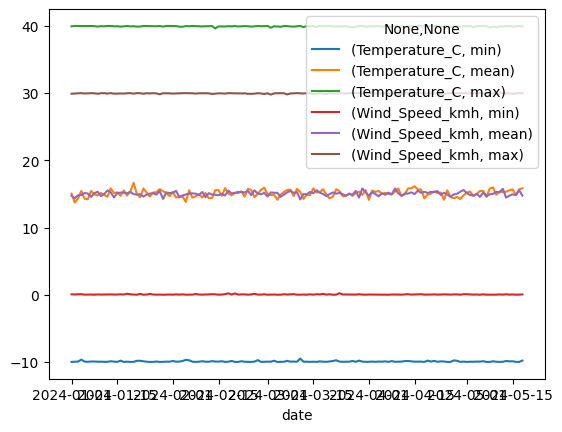

In [142]:
weather_df.plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

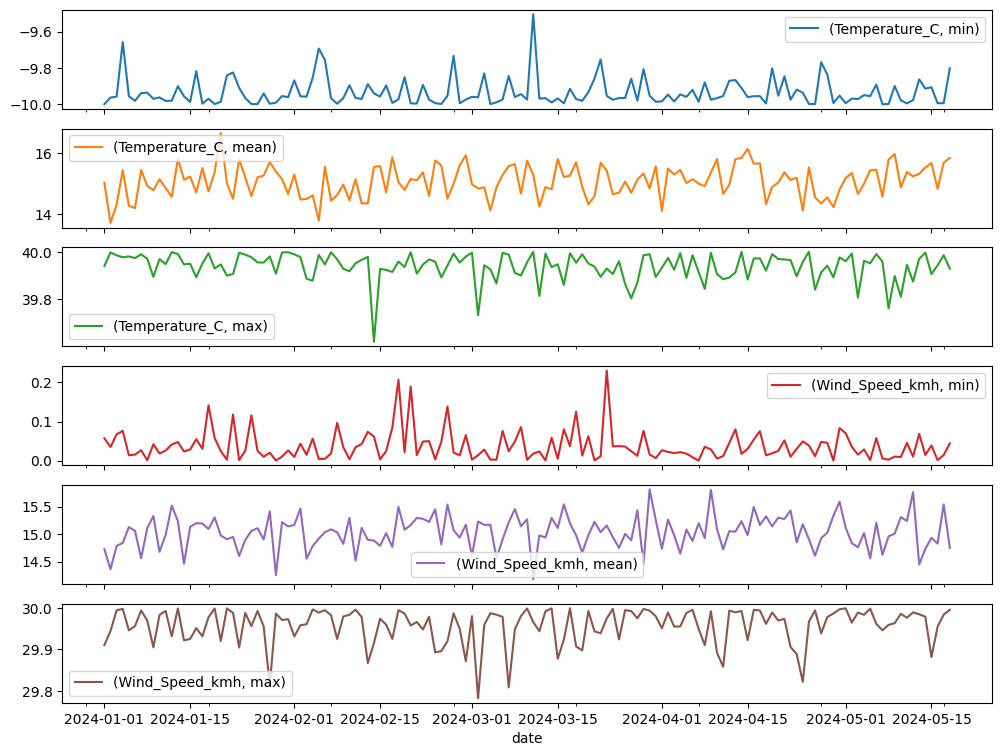

In [143]:
weather_df.plot(subplots=True, figsize=(12, 9))

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>,
        <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>,
        <Axes: xlabel='date'>]], dtype=object)

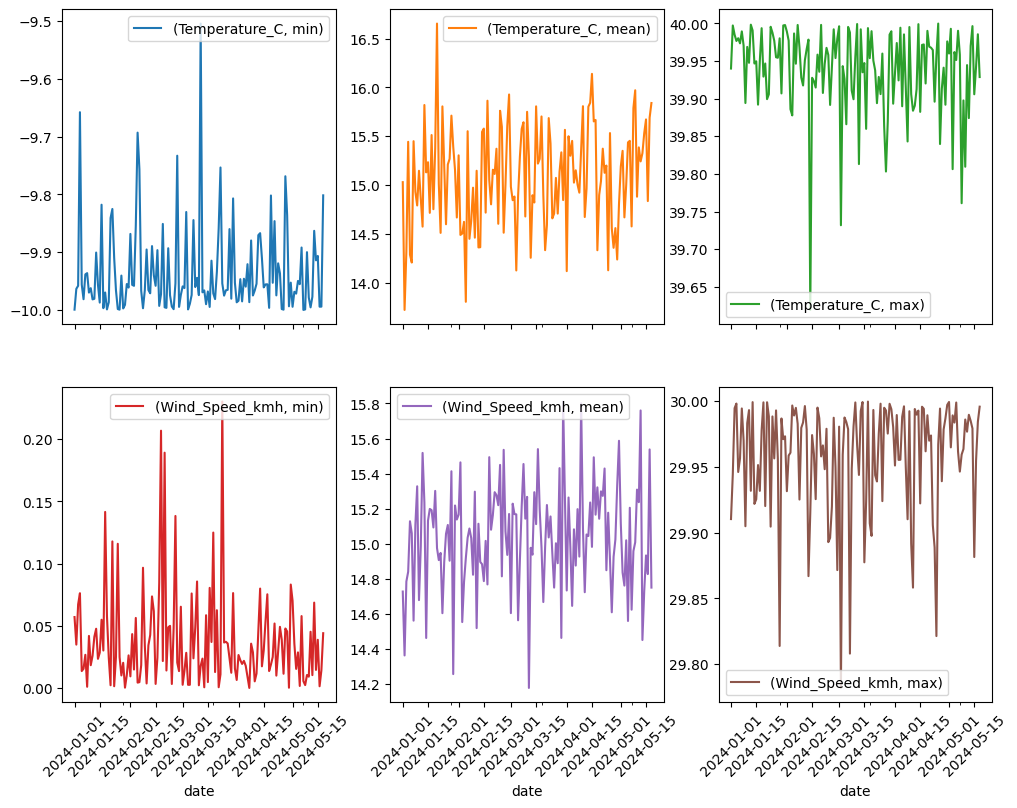

In [144]:
weather_df.plot(subplots=True, figsize=(12, 9), layout=(2, 3), rot=45)